In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('2017.csv')

### EDA

In [3]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
df.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [5]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [7]:
df[df['Country']=='Turkey']

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
68,Turkey,69,5.5,5.594865,5.405135,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,1.879278


### DATA VISUALIZATION

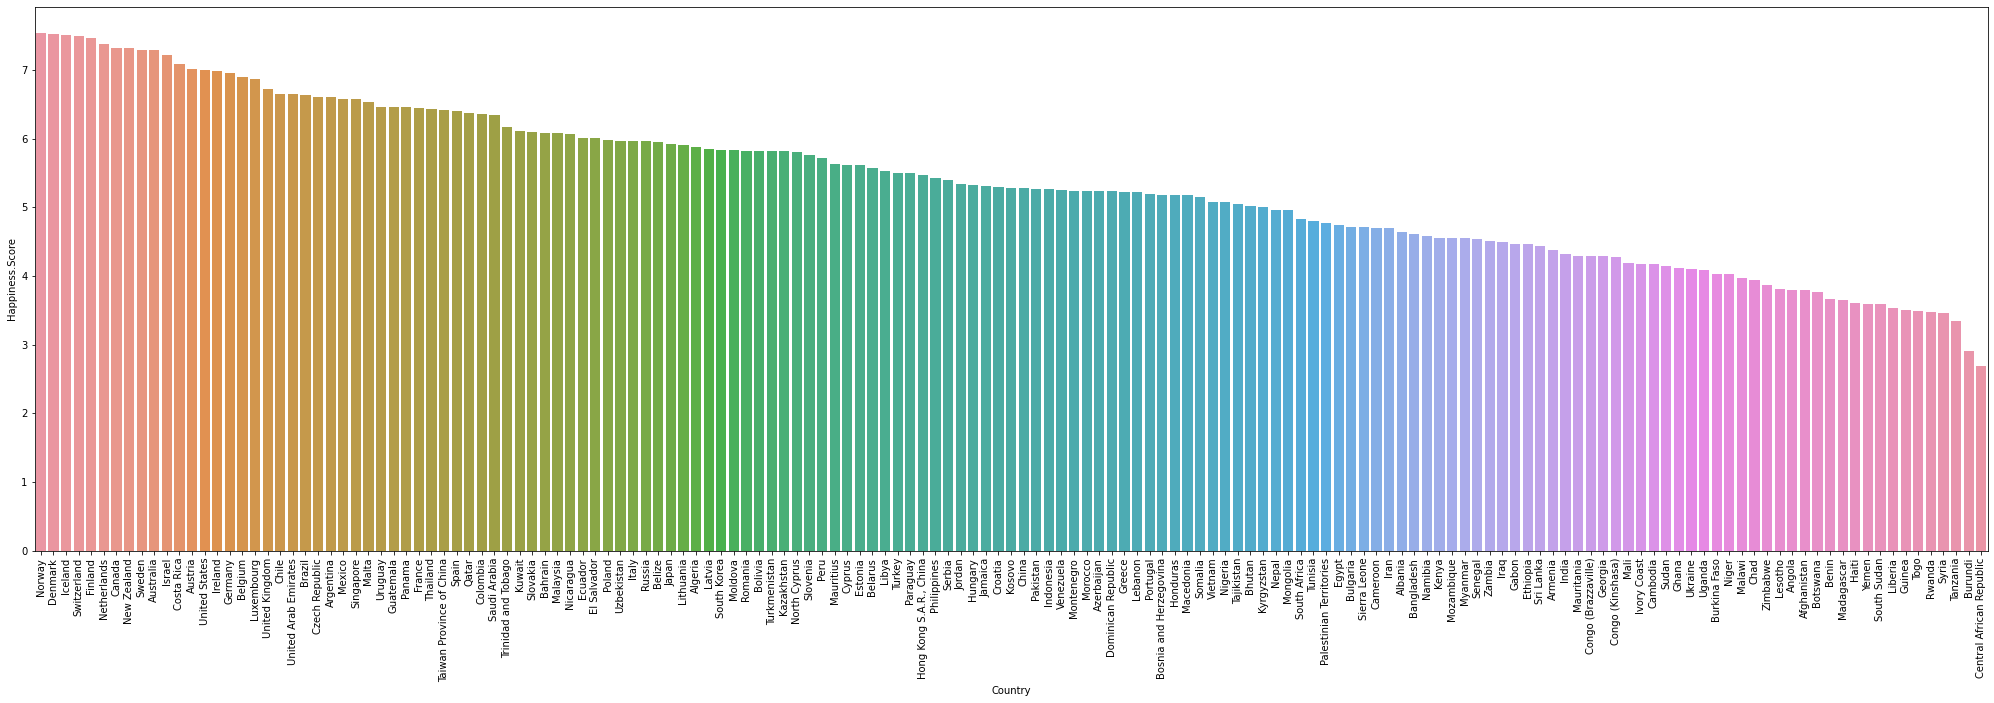

In [8]:
plt.figure(figsize=(35,10))
sns.barplot(data=df,x="Country",y="Happiness.Score")
plt.xticks(rotation=90) 
plt.show()

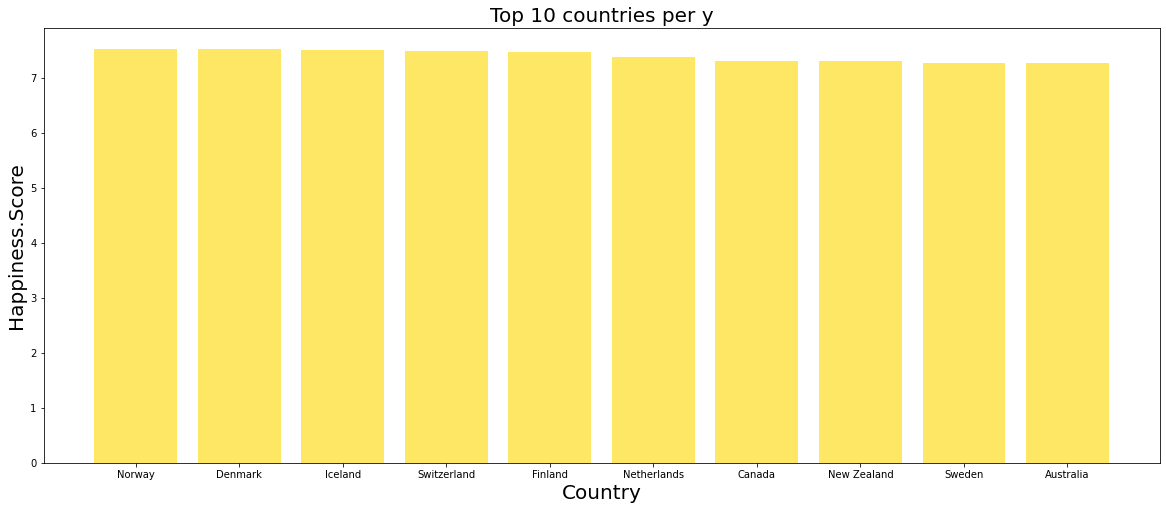

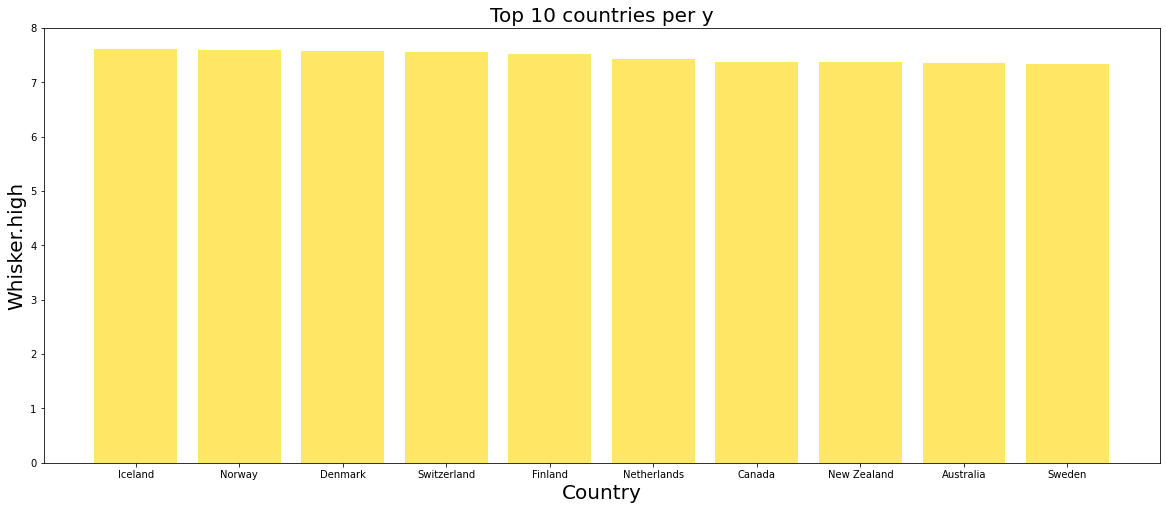

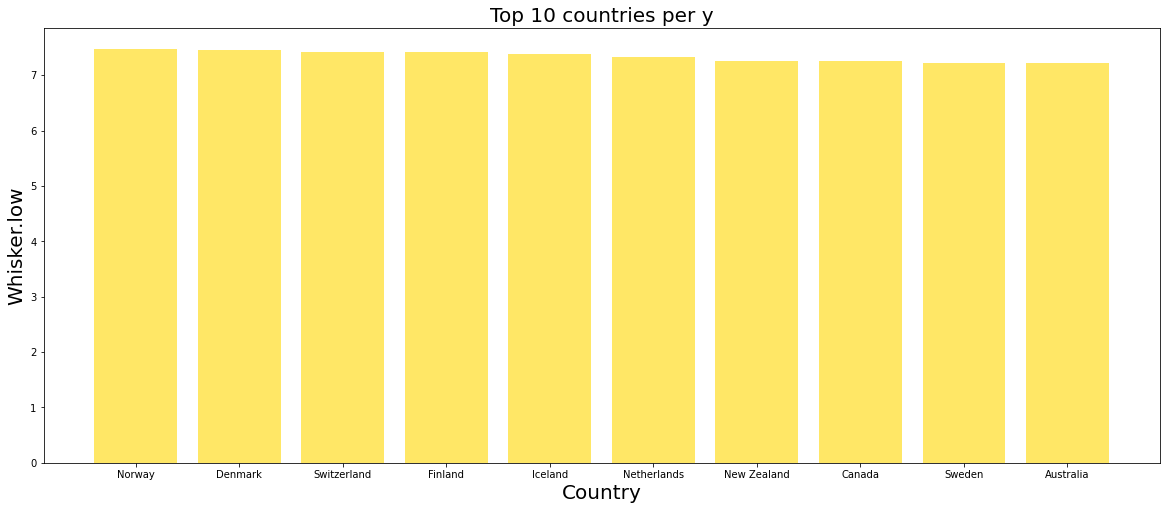

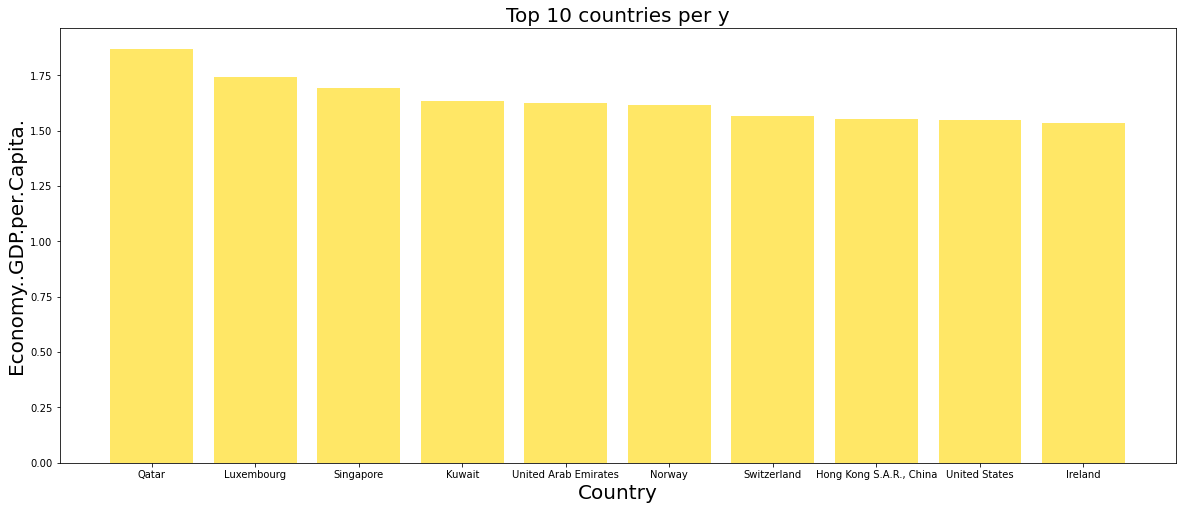

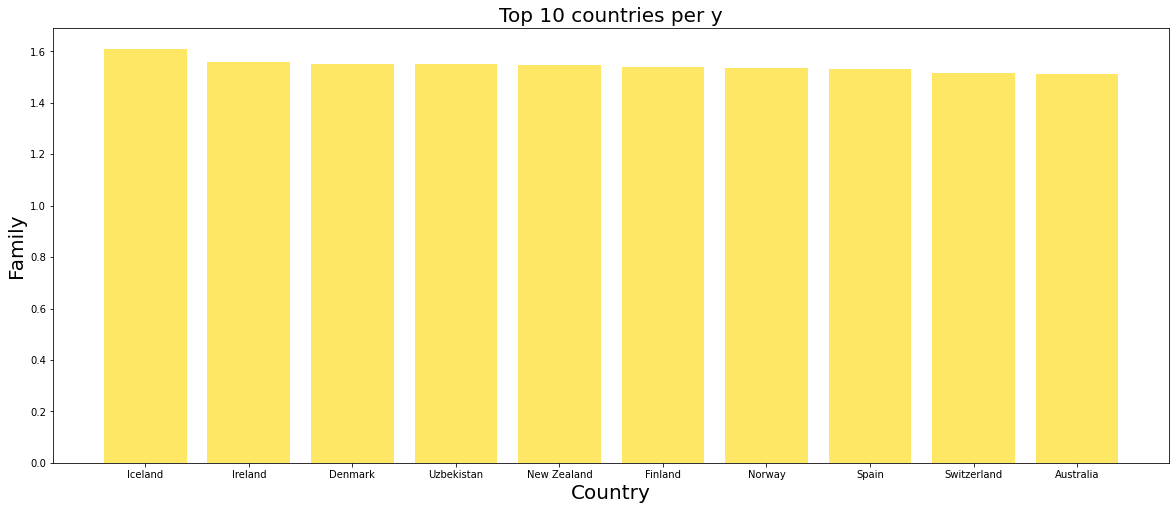

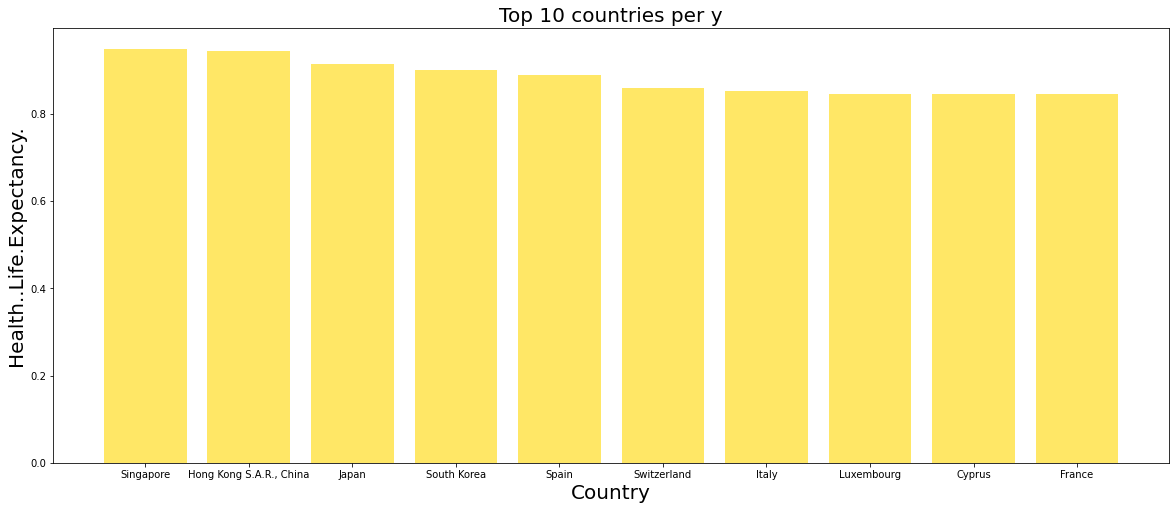

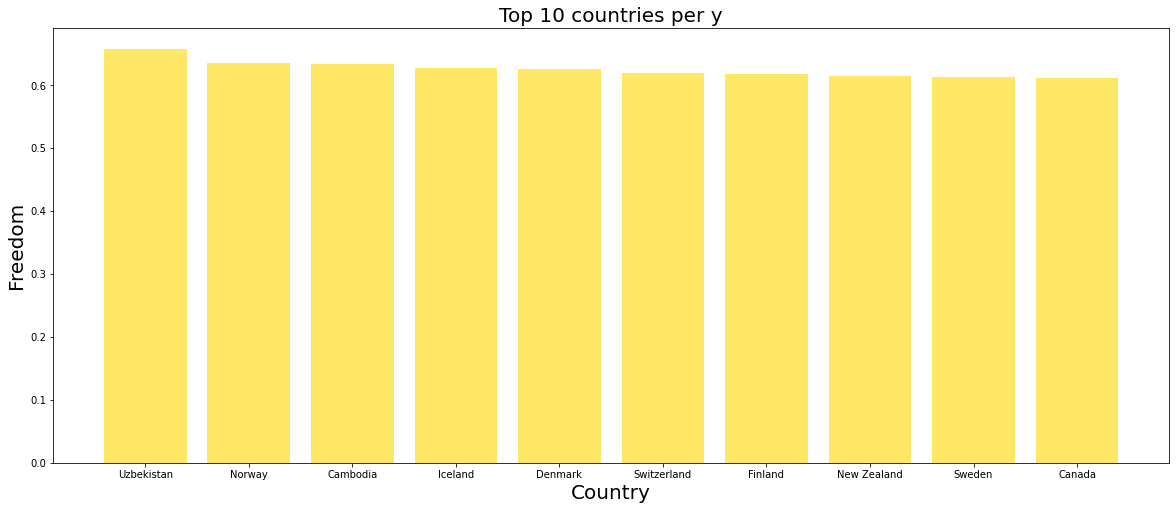

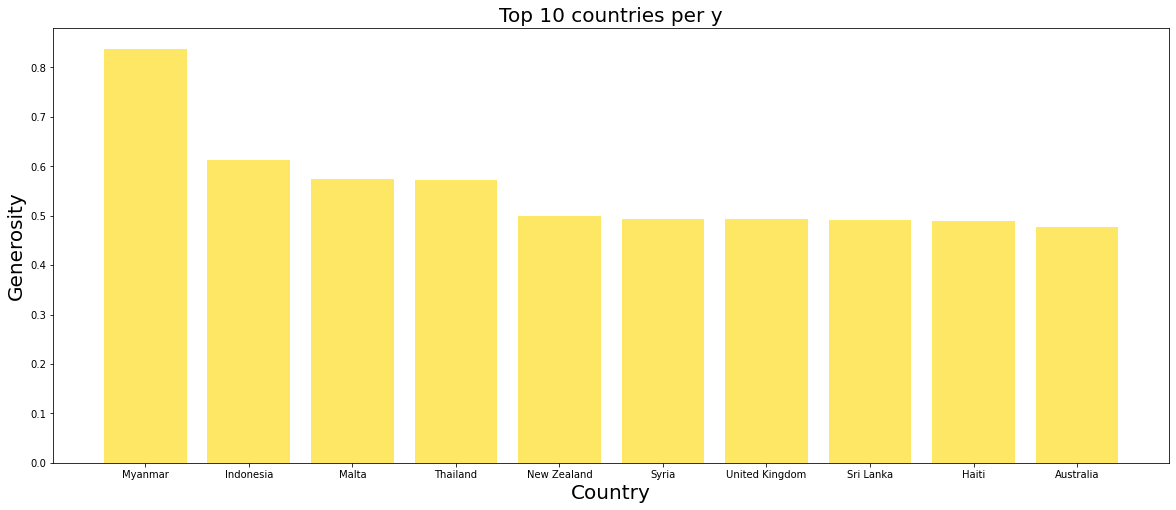

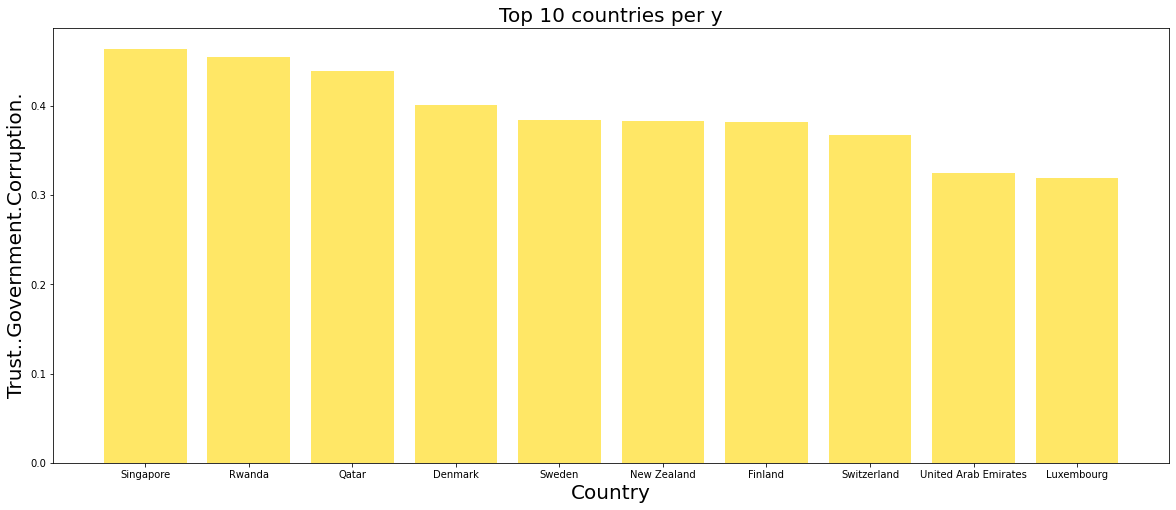

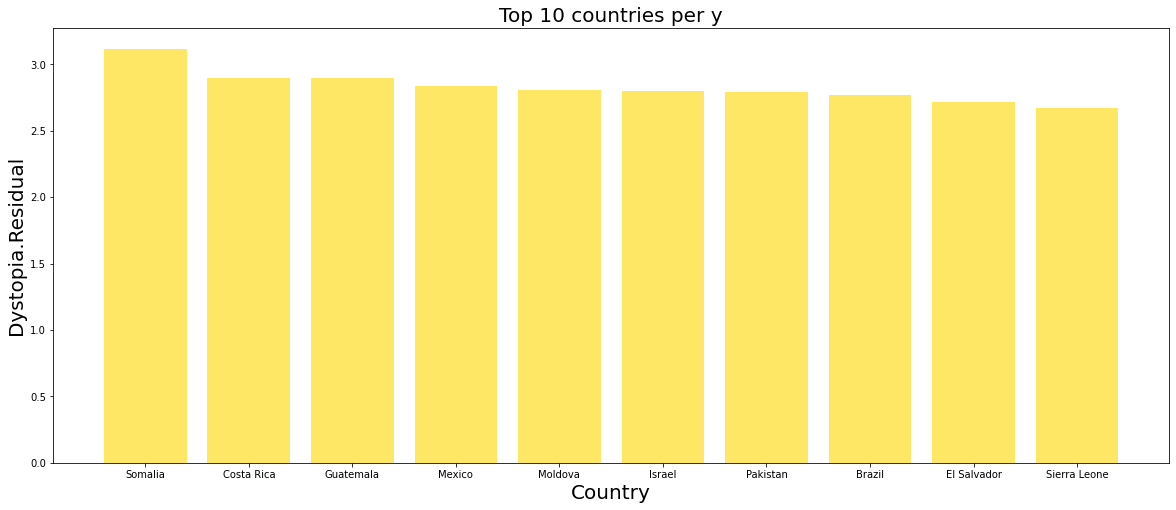

In [9]:
columns=['Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom',
       'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual']

for column in columns:
    top10 = df.nlargest(10,column)
    plt.figure(figsize=(20,8))
    plt.bar(top10['Country'], top10[column],color='gold',alpha=0.6)
    plt.ylabel(column, fontsize = 20)
    plt.xlabel("Country", fontsize = 20)
    plt.title("Top 10 countries per y", fontsize = 20)

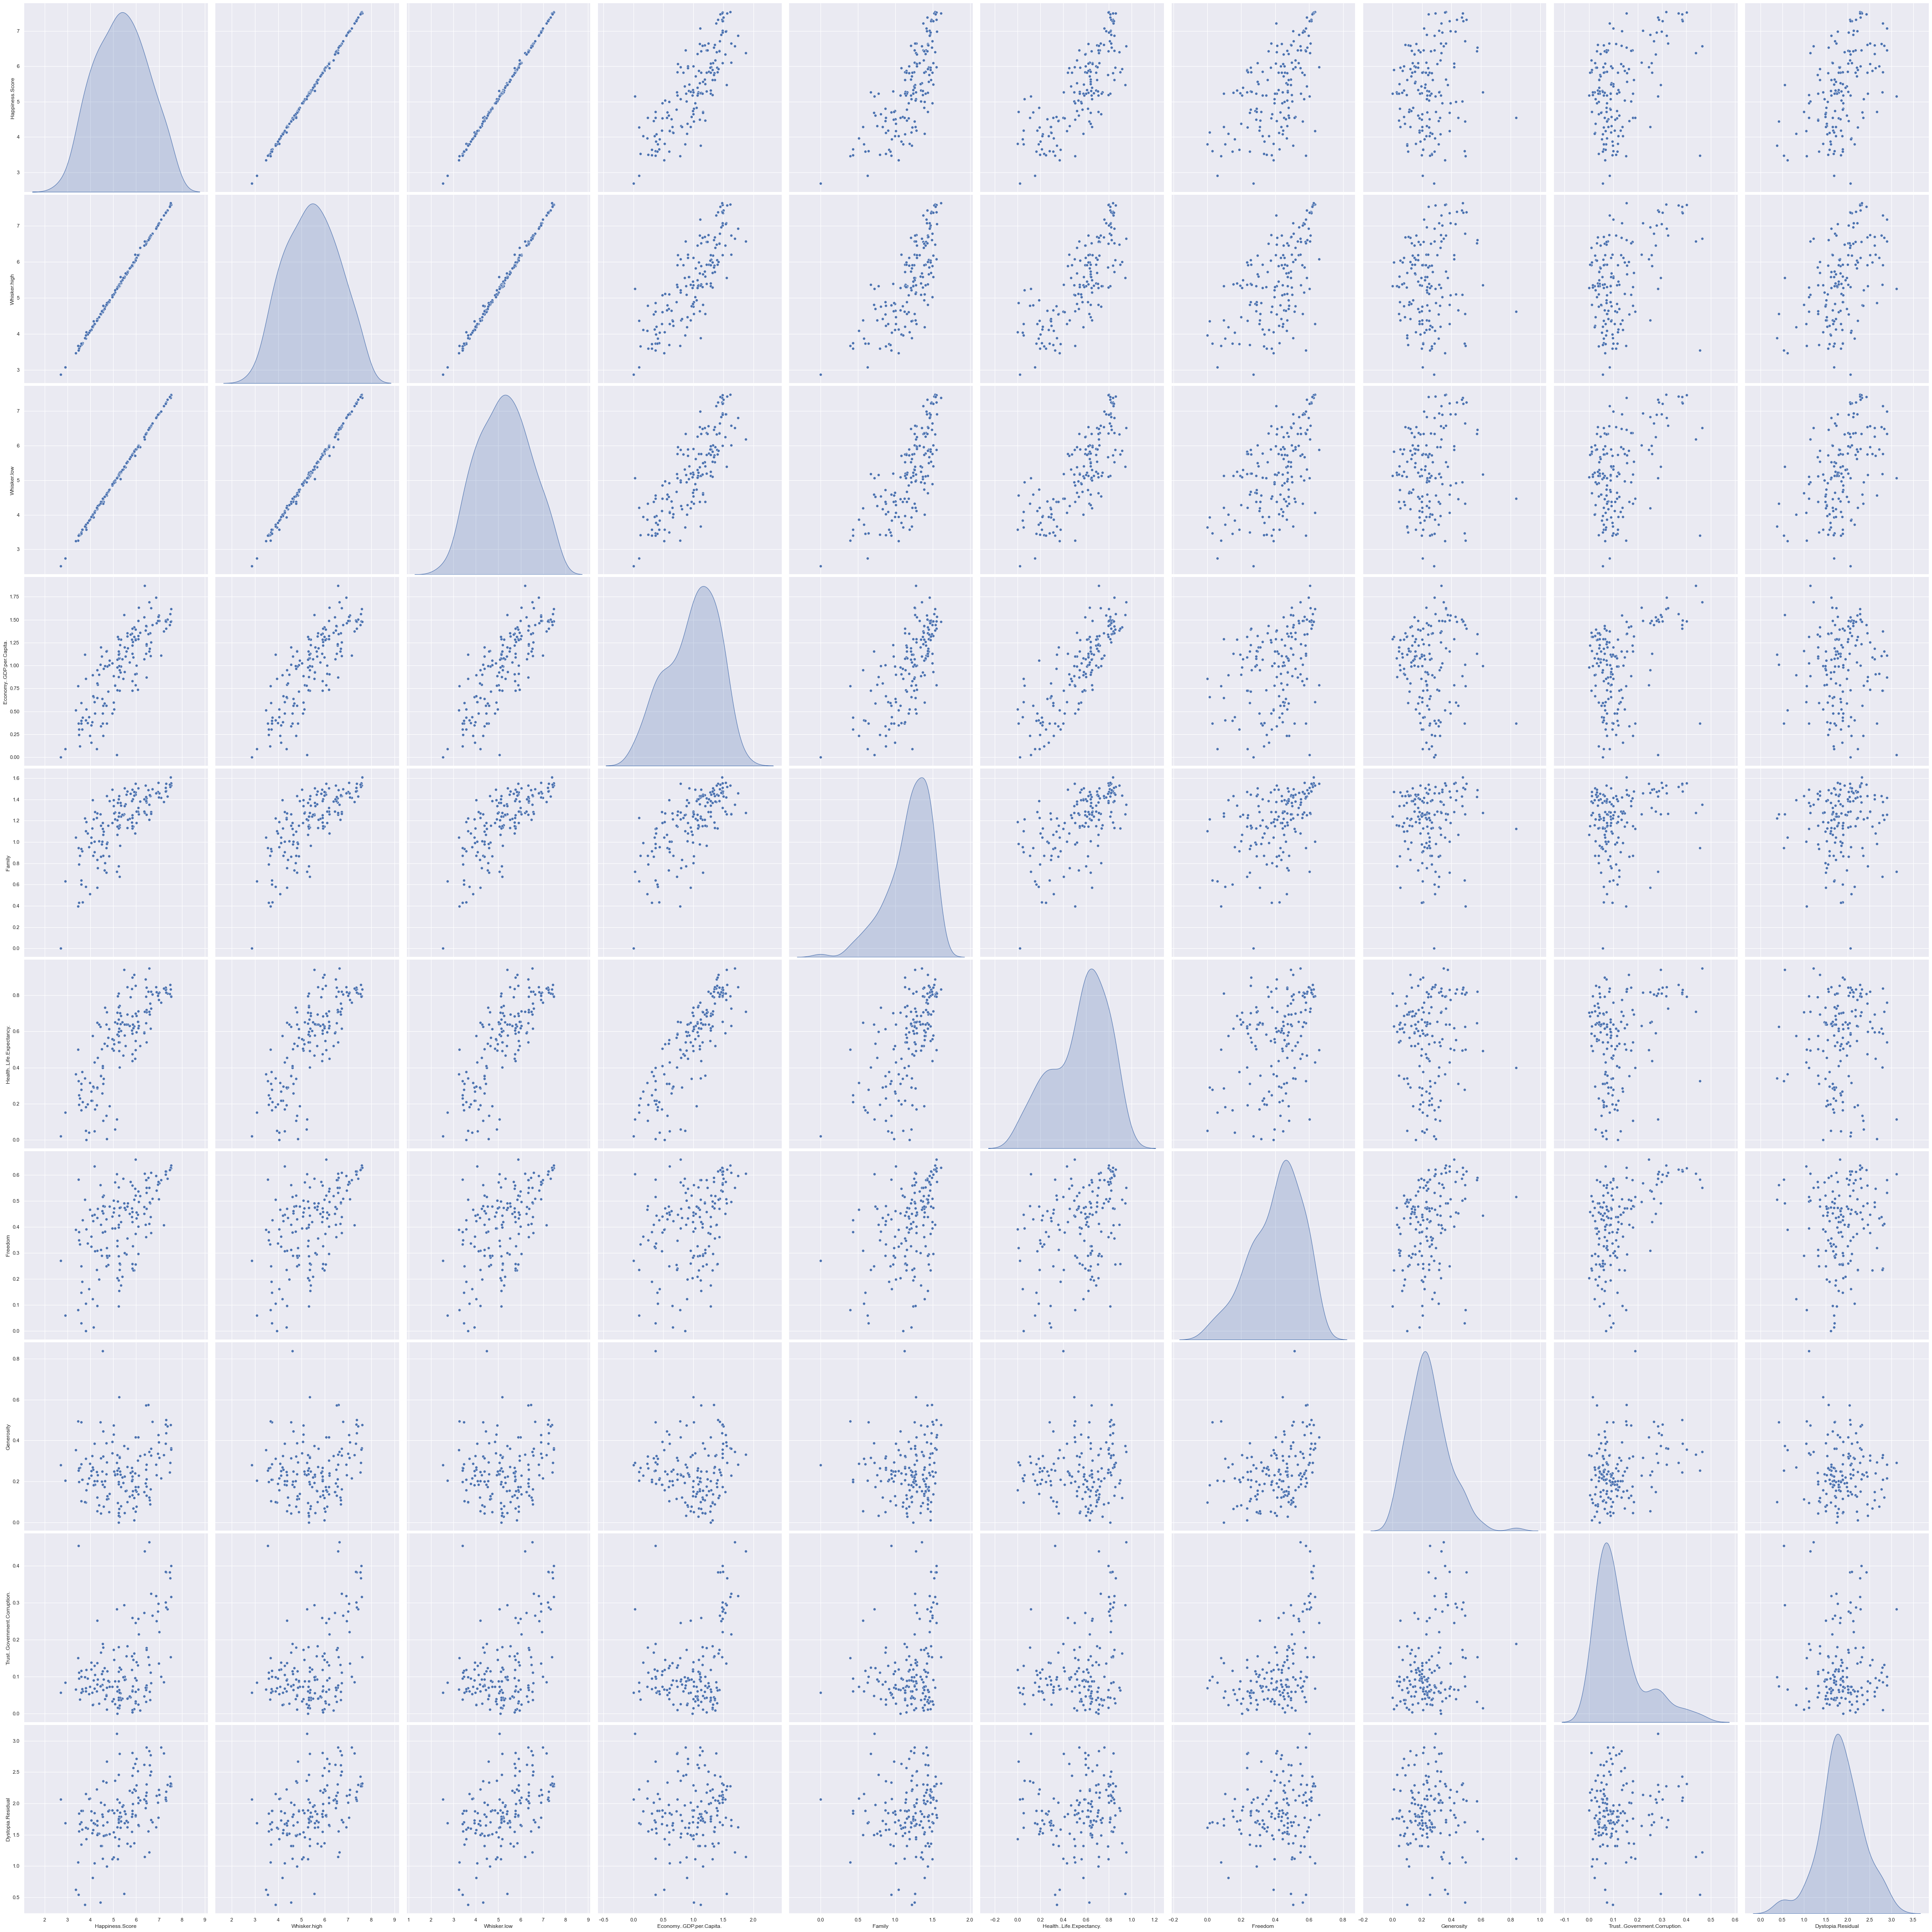

In [10]:
sns.set()
sns.pairplot(df[columns],height = 6 ,kind ='scatter',diag_kind='kde')
plt.show()

In [11]:
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


### CLUSTERING

In [12]:
x= df.drop(["Happiness.Rank"], axis=1)

In [13]:
x=df.drop('Country',axis=1)

In [14]:
x.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
x.isnull().sum()

Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness.Rank                 155 non-null    int64  
 1   Happiness.Score                155 non-null    float64
 2   Whisker.high                   155 non-null    float64
 3   Whisker.low                    155 non-null    float64
 4   Economy..GDP.per.Capita.       155 non-null    float64
 5   Family                         155 non-null    float64
 6   Health..Life.Expectancy.       155 non-null    float64
 7   Freedom                        155 non-null    float64
 8   Generosity                     155 non-null    float64
 9   Trust..Government.Corruption.  155 non-null    float64
 10  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 13.4 KB


In [17]:
model=KMeans(n_clusters=4)

In [18]:
model=model.fit(x)

In [19]:
pred=model.predict(x)

In [20]:
silhouette_score(x,pred)

0.5592928445980133

In [21]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [22]:
clust=x.assign(Cluıster=model.labels_)
model.cluster_centers_.astype('int')#merkeszi belirliyor
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [23]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred=model.fit_predict(x)
            sum_of_squared_distances.append(model.inertia_)
            score=silhouette_score(x,pred)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(9)

Number of cluster 2, silhouette 0.6213546337657918
Number of cluster 3, silhouette 0.5813816653285304
Number of cluster 4, silhouette 0.5590501141792172
Number of cluster 5, silhouette 0.5440358481940784
Number of cluster 6, silhouette 0.5334884955814769
Number of cluster 7, silhouette 0.5243418733474766
Number of cluster 8, silhouette 0.5171601932551956
Number of cluster 9, silhouette 0.510377390842133


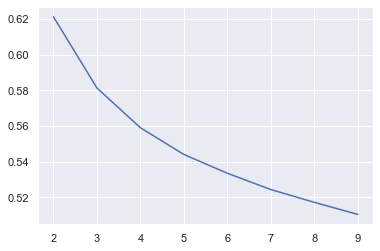

In [24]:
plt.plot(allclusters,allscore)

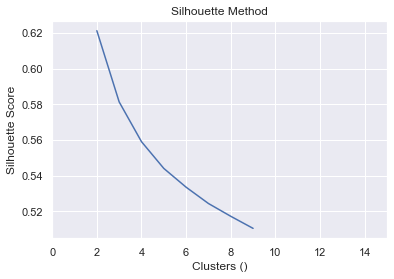

In [25]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters ()')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

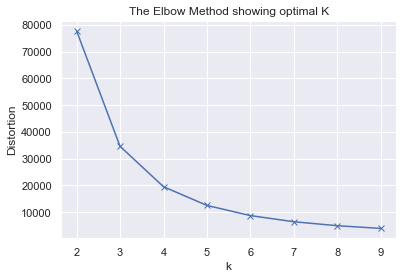

In [26]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

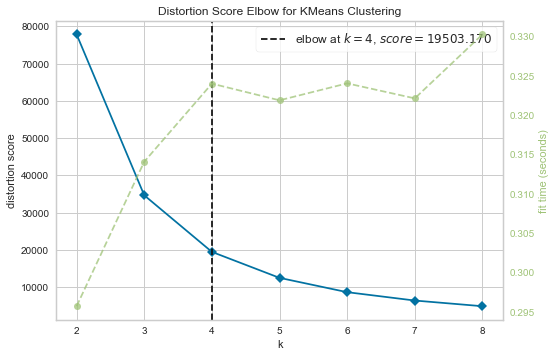

In [27]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(x)        
visualizer.show();